# Assignment 2 
### Kusal Bista a1881044 - 1 person

## A. Tasks as specified for your team structure

**One headings for each task.** 

### 1. Importing Libraries

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import warnings

warnings.filterwarnings('ignore')

import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import time

In [137]:
# pip install seaborn
# !pip install mlxtend

### 2. Data Acquisition and Preprocessing

In [138]:
train_data=pd.read_csv("basket_data_by_date_train.csv")
test_data=pd.read_csv("basket_data_by_date_test.csv")

In [139]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      40000 non-null  int64  
 1   Itemname    40000 non-null  object 
 2   Quantity    40000 non-null  int64  
 3   Date        40000 non-null  object 
 4   Price       40000 non-null  float64
 5   CustomerID  40000 non-null  int64  
 6   cost        40000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.1+ MB


In [140]:
train_data.describe()

,BillNo,Quantity,Price,CustomerID,cost
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,540254.879225,3.487700,3.732165,15577.606525,11.097411
std,2380.444952,2.611766,5.711630,1730.347123,13.298301
min,536365.000000,1.000000,0.100000,12347.000000,0.140000
25%,538093.000000,1.000000,1.650000,14224.000000,3.300000
50%,540373.000000,2.000000,2.950000,15570.000000,7.950000
75%,542360.000000,6.000000,4.650000,17220.000000,15.800000
max,544398.000000,10.000000,295.000000,18283.000000,527.700000


- **Quantity:** On average, each transaction involves buying around 3 to 4 items. The transactions range is from 1 to 10.
- **Price:** The cheapest item costs just `$0.1`, while the most expensive one is `$295.00`.
- **CustomerID:** The lowest customer number is 12347, and the highest is 18283.
- **Cost:** The smallest transaction costs just `$0.14`., while the largest one is `$527.7`.

In [141]:
train_data.head(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850,20.34
1,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850,25.50
2,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850,15.30
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850,20.34
4,536365,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850,15.30


In [142]:
train_data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
cost          0
dtype: int64

In [143]:
test_data.describe()

,BillNo,Quantity,Price,CustomerID,cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,545209.692000,3.672100,3.971454,15433.082900,11.840678
std,492.638789,2.639788,6.777596,1616.660727,13.086198
min,544398.000000,1.000000,0.160000,12352.000000,0.190000
25%,544795.000000,2.000000,1.650000,14227.000000,3.750000
50%,545181.000000,3.000000,2.950000,15358.000000,9.900000
75%,545664.000000,6.000000,4.950000,16931.000000,16.500000
max,546084.000000,10.000000,195.000000,18283.000000,290.000000


For the test data:
- **Quantity:** On average, each transaction involves buying around 3.67 items. The transactions range is from 1 to 10.
- **Price:** The cheapest item costs just `$0.10`, while the most expensive one is `$195.00`.
- **CustomerID:** The lowest customer number is 12352, and the highest is 18283.
- **Cost:** The smallest transaction costs just `$0.19` , while the largest one is `$290.00`.

In [144]:
test_data.head(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,544398.0,JUMBO SHOPPER VINTAGE RED PAISLEY,1.0,18/02/2011 12:27,1.95,15311.0,1.95
1,544398.0,ZINC WILLIE WINKIE CANDLE STICK,4.0,18/02/2011 12:27,0.85,15311.0,3.40
2,544398.0,LOVE BUILDING BLOCK WORD,2.0,18/02/2011 12:27,5.95,15311.0,11.90
3,544398.0,HANGING FAIRY CAKE DECORATION,3.0,18/02/2011 12:27,2.10,15311.0,6.30
4,544398.0,RED HEART SHAPE LOVE BUCKET,1.0,18/02/2011 12:27,2.95,15311.0,2.95


In [145]:
#removing any rows containing missing values (NaN)
test_data = test_data.dropna()

In [146]:
#checking null values in test dataset
test_data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
cost          0
dtype: int64

In [147]:
# Checking for duplicate rows
train_data.duplicated().sum()

797

In [148]:
# Checking for duplicate rows
test_data.duplicated().sum()

150

In [149]:
# Removing duplicate rows
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

In [150]:
#Lower all text
train_data=train_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
test_data=test_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [151]:
format_string = "%d/%m/%Y %H:%M"

# Converting 'Date' column to datetime objects
train_data['Date'] = pd.to_datetime(train_data['Date'], format=format_string)
test_data['Date'] = pd.to_datetime(test_data['Date'], format=format_string)

In [152]:
#Merging to plot graphs
dataset = pd.concat([train_data, test_data])

Text(0.5, 1.0, 'Top 10 Popular Sold Items')

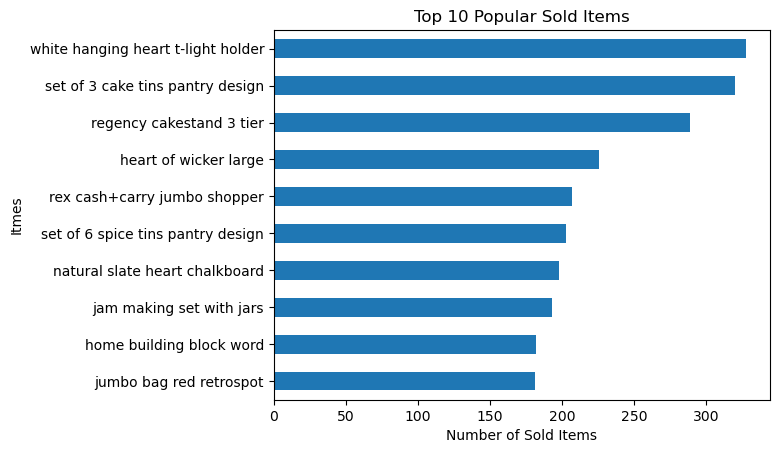

In [153]:
# Top 10 Popular Sold Items
df= dataset.groupby(["Itemname"])["Quantity"].count().sort_values(axis= 0,ascending =False)
df = df[:10,].sort_values(ascending = True)
df.plot(kind = "barh")
plt.ylabel('Itmes')
plt.xlabel('Number of Sold Items')
plt.title('Top 10 Popular Sold Items')

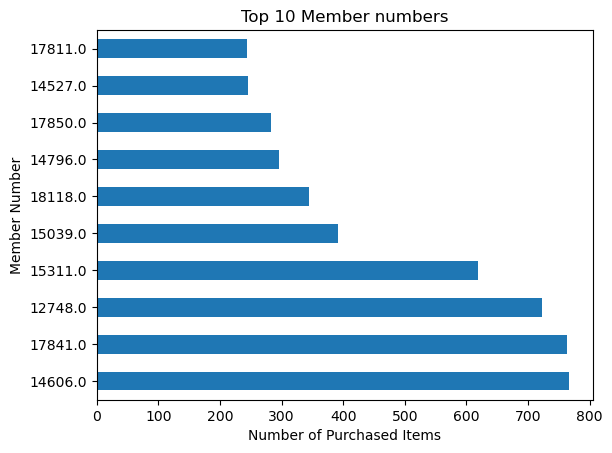

In [154]:
df = dataset.groupby("CustomerID")["CustomerID"].count().nlargest(10)
# Plot the top 10 member numbers
df.plot(kind="barh")
plt.ylabel('Member Number')
plt.xlabel('Number of Purchased Items')
plt.title('Top 10 Member numbers')
plt.show()

In [155]:
dataset[dataset['Quantity'] < 1]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost


In [156]:
zero_price_count = len(dataset[dataset['cost'] == 0])
print("Number of rows where price is zero:", zero_price_count)

# Counting the number of rows where the price is negative
negative_price_count = len(dataset[dataset['cost'] < 0])
print("Number of rows where price is negative:", negative_price_count)

Number of rows where price is zero: 0
Number of rows where price is negative: 0


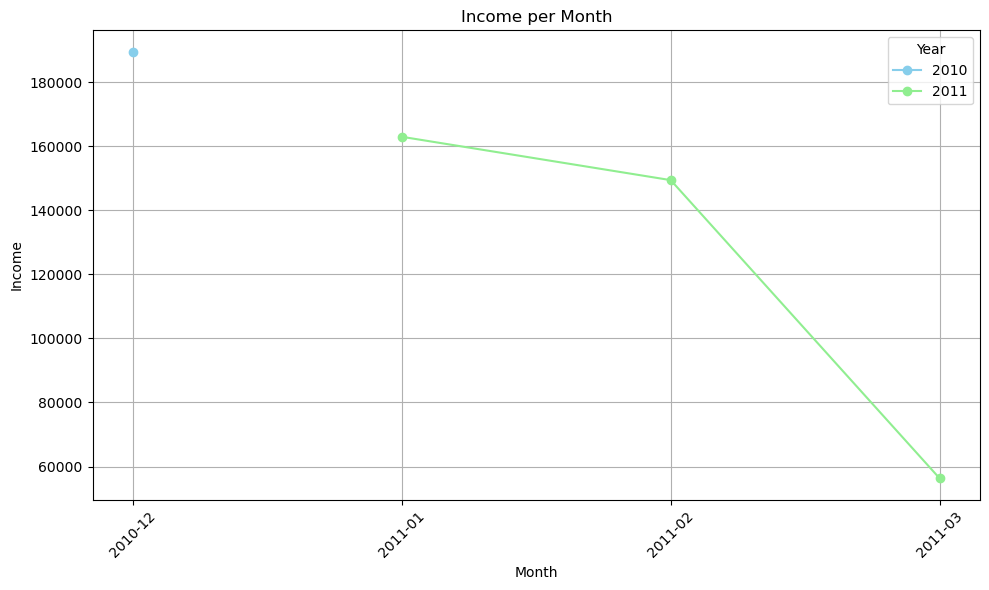

In [157]:
def plot_income_per_month(data, years, colors):
    plt.figure(figsize=(10, 6))

    for year, color in zip(years, colors):
        df_year = data[data['Date'].dt.year == year]
        df_year['Month'] = df_year['Date'].dt.strftime('%Y-%m')
        monthly_income = df_year.groupby('Month')['cost'].sum()
        plt.plot(monthly_income.index, monthly_income.values, marker='o', color=color, label=str(year))

    plt.title('Income per Month')
    plt.xlabel('Month')
    plt.ylabel('Income')
    plt.xticks(rotation=45)
    plt.legend(title='Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
years = [2010, 2011]
colors = ['skyblue', 'lightgreen']
plot_income_per_month(dataset, years, colors)

In [158]:
# # List items by CustomerID
# train_cid = train_data['BillNo'].unique()
# test_cid = test_data['BillNo'].unique()

# train_items_list = []
# test_items_list = []

# for id in train_cid:
#     train_items_list.append(list(train_data.loc[train_data['BillNo'] == id, 'Itemname']))

# for id in test_cid:
#     test_items_list.append(list(test_data.loc[test_data['BillNo'] == id, 'Itemname']))

# train_items_list

In [159]:
# train_items_list

In [160]:
# create a item matrix
def create_pivot_table(df):
    pivot_table = pd.pivot_table(df[['BillNo','Itemname']], index='BillNo', columns='Itemname', aggfunc=lambda x: True, fill_value=False)
    return pivot_table
    
# get the support value by Apriori algorithm
def generate_frequent_itemsets(pivot_table, min_support=0.01):
    frequent_itemsets = apriori(pivot_table, min_support=min_support, use_colnames=True)
    return frequent_itemsets

# create a datafram with product support, confidence , and lift values
def generate_association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5):
    rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)
    return rules

def top_5_rules(rules):
    top_5_rules = rules.sort_values(by='confidence', ascending=False).head(5)
    return top_5_rules

def print_recommendations(rules):
    for index, row in rules.iterrows():
        print('Rule #{0}'.format(index))
        premise = row['antecedents']
        conclusion = row['consequents']
        support = row['support']
        confidence = row['confidence']
        lift = row['lift']

        print('Rule: if a person buys {0} they will also buy {1}'.format(premise, conclusion))
        print('- Support: {0:.3f}'.format(support))
        print('- Confidence: {0:.3f}'.format(confidence))
        print('- Lift: {0:.3f}'.format(lift))
        print('')

def plot_support_vs_cumulative_support(rules):
    sorted_rules = rules.sort_values(by='support', ascending=False)
    cumulative_support = np.cumsum(sorted_rules['support'] / np.sum(sorted_rules['support']) * 100)
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.bar(range(len(sorted_rules)), sorted_rules['support'], align='center')
    plt.xticks(range(len(sorted_rules)), ['' for _ in range(len(sorted_rules))])
    ax1.set_xlabel('Association Rule')
    ax1.set_ylabel('Support')
    ax1.set_title('Support of Association Rules')
    ax2 = ax1.twinx()
    ax2.plot(range(len(sorted_rules)), cumulative_support, color='#AA4A44', linestyle='--')
    ax2.set_ylabel('Cumulative Support (%)', c='#AA4A44')
    plt.tight_layout()
    plt.show()

def plot_confidence_vs_support(rules):
    plt.figure(figsize=(8, 6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Confidence vs. Support of Association Rules')
    plt.tight_layout()
    plt.show()
    

In [161]:
pivot_table_train = create_pivot_table(train_data)
pivot_table_test = create_pivot_table(test_data)
pivot_table_train

Itemname,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,12 pencils tall tube posy,...,yuletide images s/6 paper boxes,zinc finish 15cm planter pots,zinc heart lattice 2 wall planter,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc metal heart decoration,zinc top 2 door wooden shelf,zinc willie winkie candle stick
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
544393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
544394,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [291]:
train_frequent_itemsets = generate_frequent_itemsets(pivot_table_train, min_support= 0.015)
test_frequent_itemsets = generate_frequent_itemsets(pivot_table_test, min_support= 0.015)

In [292]:
train_rules = generate_association_rules(train_frequent_itemsets)
test_rules = generate_association_rules(test_frequent_itemsets)

In [293]:
train_top_5_rules = top_5_rules(train_rules)
test_top_5_rules = top_5_rules(test_rules)

In [294]:
# Print frequent itemsets
print("Frequent Itemsets:")
print(train_frequent_itemsets)

# Print association rules
print("\nAssociation Rules:")
train_rules

Frequent Itemsets:
      support                                           itemsets
0    0.015055               (3 hearts hanging decoration rustic)
1    0.018621                 (3 hook photo shelf antique white)
2    0.021395               (3 piece spaceboy cookie cutter set)
3    0.016244                         (3 stripey mice feltcraft)
4    0.019810                         (36 foil heart cake cases)
..        ...                                                ...
339  0.015848  (alarm clock bakelike red, alarm clock bakelik...
340  0.017433  (alarm clock bakelike red, alarm clock bakelik...
341  0.015452  (candleholder pink hanging heart, white hangin...
342  0.015055  (heart of wicker small, white hanging heart t-...
343  0.015055  (poppy's playhouse livingroom, poppy's playhou...

[344 rows x 2 columns]

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(alarm clock bakelike ivory),(alarm clock bakelike green),0.025357,0.053883,0.016640,0.656250,12.179228,0.015274,2.752341,0.941773
1,(alarm clock bakelike orange),(alarm clock bakelike green),0.026545,0.053883,0.020998,0.791045,14.680860,0.019568,4.527847,0.957296
2,(alarm clock bakelike pink),(alarm clock bakelike green),0.032884,0.053883,0.022187,0.674699,12.521616,0.020415,2.908435,0.951425
3,(alarm clock bakelike red),(alarm clock bakelike green),0.053090,0.053883,0.036846,0.694030,12.880378,0.033986,3.092188,0.974077
4,(alarm clock bakelike green),(alarm clock bakelike red),0.053883,0.053090,0.036846,0.683824,12.880378,0.033986,2.994877,0.974892
5,(alarm clock bakelike ivory),(alarm clock bakelike red),0.025357,0.053090,0.016244,0.640625,12.066698,0.014898,2.634879,0.940988
6,(alarm clock bakelike orange),(alarm clock bakelike red),0.026545,0.053090,0.018225,0.686567,12.932056,0.016816,3.021093,0.947833
7,(alarm clock bakelike pink),(alarm clock bakelike red),0.032884,0.053090,0.021791,0.662651,12.481568,0.020045,2.806911,0.951160
8,(blue 3 piece polkadot cutlery set),(pink 3 piece polkadot cutlery set),0.030903,0.030903,0.020998,0.679487,21.987508,0.020043,3.023582,0.984958
9,(pink 3 piece polkadot cutlery set),(blue 3 piece polkadot cutlery set),0.030903,0.030903,0.020998,0.679487,21.987508,0.020043,3.023582,0.984958


In [295]:
train_rules = train_rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
train_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
44,"(alarm clock bakelike red, alarm clock bakelik...",(alarm clock bakelike green),0.018225,0.053883,0.015848,0.869565,16.138107,0.014866,7.253566,0.955448
54,"(poppy's playhouse livingroom, poppy's playhou...",(poppy's playhouse bedroom),0.017433,0.026149,0.015055,0.863636,33.027548,0.014600,7.141574,0.986927
55,"(poppy's playhouse livingroom, poppy's playhou...",(poppy's playhouse kitchen),0.017829,0.029319,0.015055,0.844444,28.802402,0.014533,6.240095,0.982803
47,"(alarm clock bakelike red, alarm clock bakelik...",(alarm clock bakelike green),0.021791,0.053883,0.017433,0.800000,14.847059,0.016258,4.730586,0.953422
51,"(candleholder pink hanging heart, red hanging ...",(white hanging heart t-light holder),0.019414,0.105388,0.015452,0.795918,7.552248,0.013406,4.383597,0.884766
1,(alarm clock bakelike orange),(alarm clock bakelike green),0.026545,0.053883,0.020998,0.791045,14.680860,0.019568,4.527847,0.957296
31,(poppy's playhouse bedroom),(poppy's playhouse kitchen),0.026149,0.029319,0.020602,0.787879,26.873055,0.019836,4.576070,0.988640
48,"(alarm clock bakelike pink, alarm clock bakeli...",(alarm clock bakelike red),0.022187,0.053090,0.017433,0.785714,14.799574,0.016255,4.418912,0.953588
32,(poppy's playhouse livingroom),(poppy's playhouse bedroom),0.022979,0.026149,0.017829,0.775862,29.670846,0.017228,4.344874,0.989024
34,(poppy's playhouse livingroom),(poppy's playhouse kitchen),0.022979,0.029319,0.017433,0.758621,25.875116,0.016759,4.021395,0.983964


In [296]:
train_rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
38,(set of 6 spice tins pantry design),(set of 3 cake tins pantry design),0.053883,0.090333,0.038431,0.713235,7.895640,0.033564,3.172173,0.923086
4,(alarm clock bakelike green),(alarm clock bakelike red),0.053883,0.053090,0.036846,0.683824,12.880378,0.033986,2.994877,0.974892
3,(alarm clock bakelike red),(alarm clock bakelike green),0.053090,0.053883,0.036846,0.694030,12.880378,0.033986,3.092188,0.974077
24,(heart of wicker small),(heart of wicker large),0.059033,0.076466,0.036054,0.610738,7.987064,0.031540,2.372527,0.929680
36,(red hanging heart t-light holder),(white hanging heart t-light holder),0.062203,0.105388,0.032488,0.522293,4.955893,0.025933,1.872721,0.851165
42,(wooden picture frame white finish),(wooden frame antique white),0.045166,0.048336,0.027734,0.614035,12.703480,0.025551,2.465675,0.964861
43,(wooden frame antique white),(wooden picture frame white finish),0.048336,0.045166,0.027734,0.573770,12.703480,0.025551,2.240187,0.968074
13,(candleholder pink hanging heart),(white hanging heart t-light holder),0.037242,0.105388,0.024564,0.659574,6.258519,0.020639,2.627922,0.872720
40,(wood s/3 cabinet ant white finish),(wood 2 drawer cabinet white finish),0.037639,0.038827,0.023376,0.621053,15.995274,0.021914,2.536428,0.974147
41,(wood 2 drawer cabinet white finish),(wood s/3 cabinet ant white finish),0.038827,0.037639,0.023376,0.602041,15.995274,0.021914,2.418241,0.975352


In [297]:
print_recommendations(train_rules)

Rule #44
Rule: if a person buys frozenset({'alarm clock bakelike red', 'alarm clock bakelike orange'}) they will also buy frozenset({'alarm clock bakelike green'})
- Support: 0.016
- Confidence: 0.870
- Lift: 16.138

Rule #54
Rule: if a person buys frozenset({"poppy's playhouse livingroom", "poppy's playhouse kitchen"}) they will also buy frozenset({"poppy's playhouse bedroom"})
- Support: 0.015
- Confidence: 0.864
- Lift: 33.028

Rule #55
Rule: if a person buys frozenset({"poppy's playhouse livingroom", "poppy's playhouse bedroom"}) they will also buy frozenset({"poppy's playhouse kitchen"})
- Support: 0.015
- Confidence: 0.844
- Lift: 28.802

Rule #47
Rule: if a person buys frozenset({'alarm clock bakelike red', 'alarm clock bakelike pink'}) they will also buy frozenset({'alarm clock bakelike green'})
- Support: 0.017
- Confidence: 0.800
- Lift: 14.847

Rule #51
Rule: if a person buys frozenset({'candleholder pink hanging heart', 'red hanging heart t-light holder'}) they will also bu

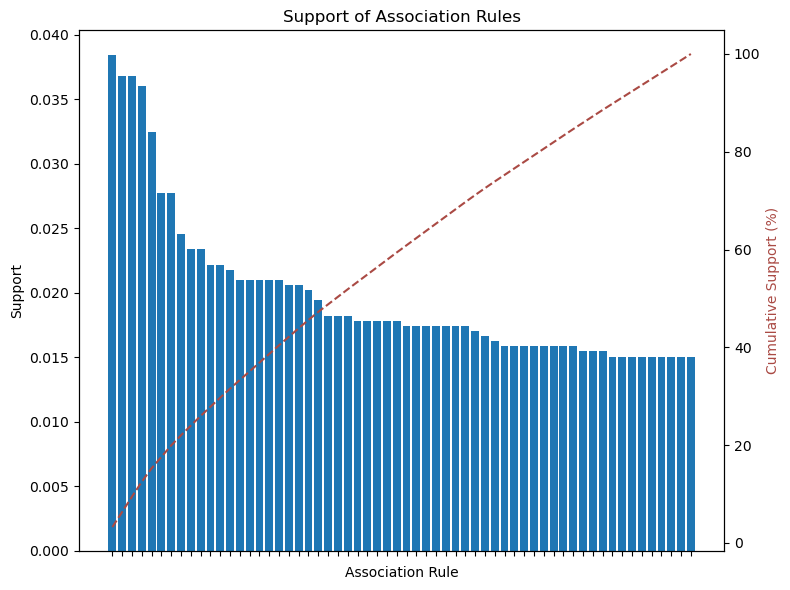

In [298]:
plot_support_vs_cumulative_support(train_rules)

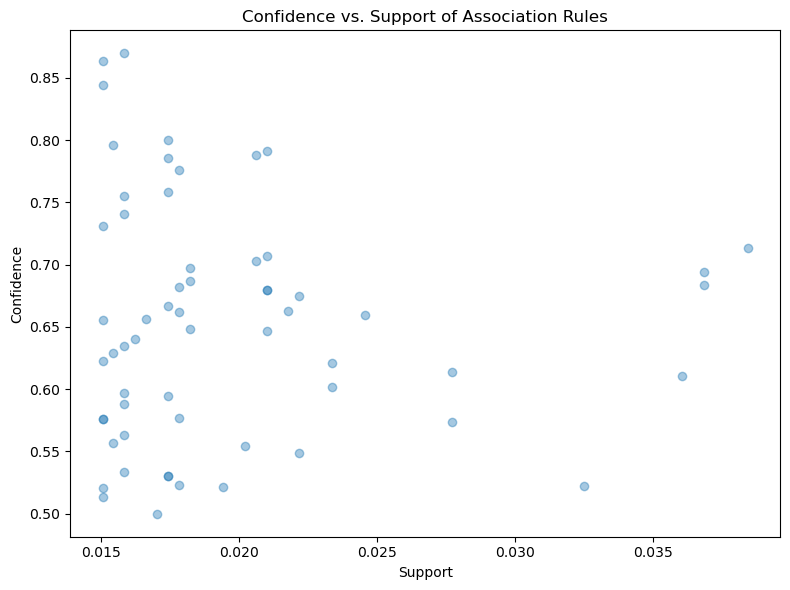

In [299]:
plot_confidence_vs_support(train_rules)

In [301]:
def predict_items(purchased_items):
    # create a list to store the predicted items
    predicted_items = []
    
    # iterate over the top rules
    for index, row in train_rules.iterrows():
        # get the items in the antecedent and consequent of the rule
        antecedent = row["antecedents"]
        consequent = row["consequents"]
        # print("antecedents", antecedent, "consequents",consequent)
        # check if all the items in the antecedent are in the purchased items
        if antecedent.issubset(purchased_items):
            # add the items in the consequent to the predicted items
            predicted_items.append(consequent)
    
    # return the list of predicted items
    return predicted_items

In [302]:
# make a prediction for a sample set of purchased items
purchased_items = {"alarm clock bakelike green"}
predicted_items = predict_items(purchased_items)

In [303]:
predicted_items

[frozenset({'alarm clock bakelike red'})]

In [306]:
train_df=train_data.copy()
test_df = test_data.copy()

In [308]:
train_rating_df = pd.DataFrame(columns=["CustomerID", "Itemname", "Rating"])

for i in range(len(train_df)):
    customer_id = train_df.iloc[i]["CustomerID"]
    item_name = train_df.iloc[i]["Itemname"]
    tmp = train_df.loc[(train_df["CustomerID"] == customer_id) & (train_df["Itemname"] == item_name)]
    count = len(tmp)
    new_line = {"CustomerID": customer_id, "Itemname": item_name, "Rating": count}
    train_rating_df = pd.concat([train_rating_df, pd.DataFrame([new_line])], ignore_index=True)

In [309]:
test_rating_df = pd.DataFrame(columns=["CustomerID", "Itemname", "Rating"])

for i in range(len(test_df)):
    customer_id = test_df.iloc[i]["CustomerID"]
    item_name = test_df.iloc[i]["Itemname"]
    tmp = test_df.loc[(test_df["CustomerID"] == customer_id) & (test_df["Itemname"] == item_name)]
    count = len(tmp)
    new_line = {"CustomerID": customer_id, "Itemname": item_name, "Rating": count}
    test_rating_df = pd.concat([test_rating_df, pd.DataFrame([new_line])], ignore_index=True)


In [310]:
#drop duplicates
train_rating = train_rating_df.drop_duplicates()
test_rating = test_rating_df.drop_duplicates()

In [335]:
unique_customer_count = dataset['CustomerID'].unique()
unique_items_count = dataset['Itemname'].unique()

In [336]:
print("Total customer count:", len(unique_customer_count))
print("Total items count:", len(unique_items_count))

Total customer count: 1660
Total items count: 2641


In [338]:
train_rating_piv_df = pd.DataFrame(pd.pivot_table(train_rating, index='Itemname', columns='CustomerID', values='Rating'))
train_rating_piv_df.fillna(0, inplace=True)

In [348]:
similarity_matrix_train_df = pd.DataFrame(cosine_similarity(train_rating_piv_df, train_rating_piv_df), index=train_rating_piv_df.index, columns=train_rating_piv_df.index)
similarity_matrix_train_df

Itemname,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,12 pencils tall tube posy,...,yuletide images s/6 paper boxes,zinc finish 15cm planter pots,zinc heart lattice 2 wall planter,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc metal heart decoration,zinc top 2 door wooden shelf,zinc willie winkie candle stick
Itemname,,,,,,,,,,,,,,,,,,,,,
10 colour spaceboy pen,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.096225,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.078087,0.000000,0.106600
12 coloured party balloons,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.196116,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12 daisy pegs in wood box,0.000000,0.0,1.000000,0.062869,0.000000,0.000000,0.160514,0.184302,0.100167,0.057831,...,0.000000,0.047836,0.000000,0.000000,0.000000,0.000000,0.0,0.065129,0.000000,0.000000
12 egg house painted wood,0.000000,0.0,0.062869,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.069171,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.123091,0.000000
12 ivory rose peg place settings,0.000000,0.0,0.000000,0.000000,1.000000,0.146385,0.215166,0.158114,0.107417,0.000000,...,0.149071,0.102598,0.316228,0.000000,0.000000,0.000000,0.0,0.069843,0.091287,0.286039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zinc heart lattice t-light holder,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.072169,0.065372,0.113228,...,0.000000,0.000000,0.000000,0.288675,0.408248,1.000000,0.0,0.063758,0.000000,0.000000
zinc heart lattice tray oval,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
zinc metal heart decoration,0.078087,0.0,0.065129,0.000000,0.069843,0.102240,0.150278,0.276079,0.150047,0.043315,...,0.104116,0.000000,0.000000,0.000000,0.000000,0.063758,0.0,1.000000,0.000000,0.133185


In [351]:
test_rating_piv_df = pd.DataFrame(pd.pivot_table(test_rating, index='Itemname', columns='CustomerID', values='Rating'))
test_rating_piv_df.fillna(0, inplace=True)

similarity_matrix_test_df = pd.DataFrame(cosine_similarity(test_rating_piv_df, test_rating_piv_df), index=test_rating_piv_df.index,
                                    columns=test_rating_piv_df.index)
similarity_matrix_test_df

Itemname,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,12 pencils tall tube red retrospot,...,yellow metal chicken heart,yellow shark helicopter,you're confusing me metal sign,zinc finish 15cm planter pots,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc metal heart decoration,zinc willie winkie candle stick
Itemname,,,,,,,,,,,,,,,,,,,,,
10 colour spaceboy pen,1.000000,0.0,0.447214,0.0,0.0,0.577350,0.0,0.0,0.0,0.0,...,0.485071,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.577350,0.0
12 coloured party balloons,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
12 daisy pegs in wood box,0.447214,0.0,1.000000,0.0,0.2,0.258199,0.0,0.0,0.0,0.0,...,0.216930,0.0,0.316228,0.0,0.000000,0.0,0.0,0.0,0.387298,0.0
12 egg house painted wood,0.000000,0.0,0.000000,1.0,0.4,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
12 ivory rose peg place settings,0.000000,0.0,0.200000,0.4,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.158114,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zinc heart lattice charger small,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.707107,1.0,0.0,1.0,0.000000,0.0
zinc heart lattice t-light holder,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0
zinc heart lattice tray oval,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.707107,1.0,0.0,1.0,0.000000,0.0


In [352]:
#Get the predicted rating (code adapted from workshop and https://medium.com/geekculture/overview-of-item-item-collaborative-filtering-recommendation-system)
def get_prediction(userid, itemname, sim_rating, rating):
    user_rating = rating.loc[:,userid]
    item_similarity = sim_rating.sort_values(by=itemname, ascending=False).loc[:, itemname].tolist()
    weighted_sum = np.dot(item_similarity, user_rating)
    weighted_sum /= np.sum(item_similarity)
    return weighted_sum

In [354]:
#Evaulate performance on train data set
prediction = []
train_real = train_rating['Rating'].to_numpy()
for _,row in train_rating.iterrows():
    result = get_prediction(row[0], row[1], similarity_matrix_train_df, train_rating_piv_df)
    prediction.append(result)
rmse = np.sqrt(np.mean((train_real - prediction)**2))
print(f'Train data RMSE = {rmse}')

Train data RMSE = 1.2403121192131223


In [355]:
#Evaulate performance on test data set
prediction = []
test_real = test_rating['Rating'].to_numpy()
for _,row in test_rating.iterrows():
    result = get_prediction(row[0], row[1], similarity_matrix_test_df, test_rating_piv_df)
    prediction.append(result)
rmse = np.sqrt(np.mean((test_real - prediction)**2))
print(f'Test data RMSE = {rmse}')

Test data RMSE = 1.0389001878792568


In [356]:
# get the recommandations
def get_recommandation(item,n):
    if item not in sim_rating.columns:
        print("The item is not in the list!")
        return None
    else:
        recommendations=pd.DataFrame(columns=["itemDescription","predicted_item","similarity"])
        items = sim_rating.sort_values(by=item, ascending=False).index[1:]
        score = sim_rating.sort_values(by=item, ascending=False).loc[:, item].tolist()[1:]
        recommendations["predicted_item"]=items[:n]
        recommendations["similarity"]=score[:n]
        recommendations["itemDescription"]=item
        return recommendations

In [359]:
get_recommandation("diamante hair grip pack/2 montana",5)

,itemDescription,predicted_item,similarity
0,diamante hair grip pack/2 montana,diamante hair grip pack/2 ruby,1.000000
1,diamante hair grip pack/2 montana,diamante hair grip pack/2 black dia,1.000000
2,diamante hair grip pack/2 montana,diamante hair grip pack/2 montana,1.000000
3,diamante hair grip pack/2 montana,christmas tree t-light holder,1.000000
4,diamante hair grip pack/2 montana,star t-light holder,0.894427


## B. References

## C. Appendix